# 1)customer: Contains information about customers, including their ID, name,contact details, and address.
# product: Contains details about the products available for purchase, including product ID, name, category, and pricing.
# order_details: Captures information about customer orders, including order ID, customer ID, product ID, quantity, total price, payment mode, order date, and order status.

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with
#actual credentials
connection = mysql.connector.connect(
user='root',
password='Pneumatica',
host='localhost',
database='ecommerce'
)
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
#printing first 5 records from each table
print(customer_data.head())
print(product_data.head())
print(order_data.head())

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  
  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics        phone         45000.0   
3

# 2) Identify the total number of customers City wise


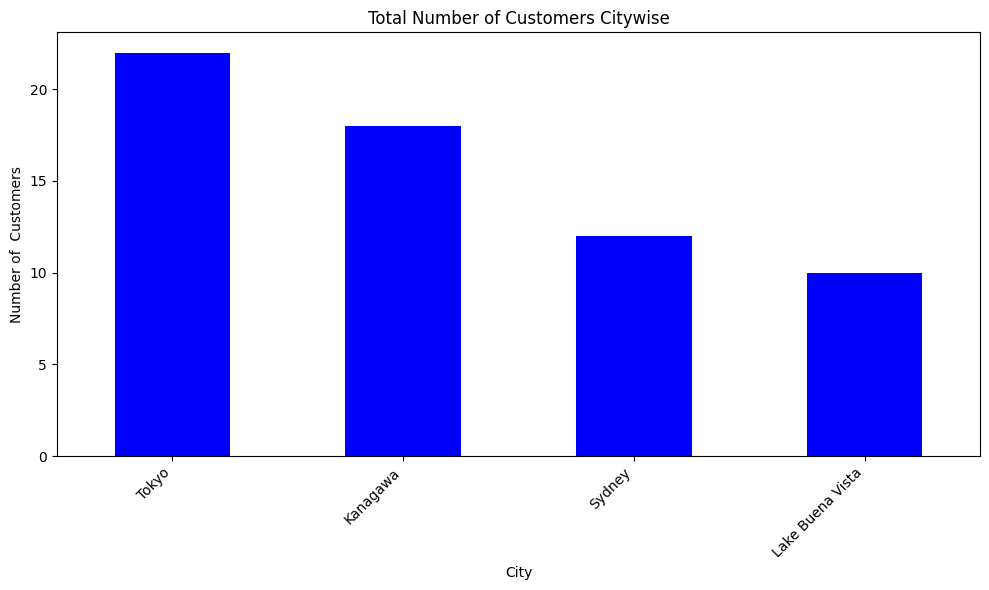

In [34]:
city_counts= customer_data['city'].value_counts()

  #Ploting the bar graph
plt.figure(figsize=(10,6))
city_counts.plot(kind='bar', color= 'blue')
plt.title('Total Number of Customers Citywise')
plt.xlabel('City')
plt.ylabel('Number of  Customers')
plt.xticks(rotation=45, ha= 'right') # Rotate city names for better readability
plt.tight_layout()   # Adjust layout to prevent clipping of labels
plt.show()


# 3)Identify the Top 10 customers based on their order history.



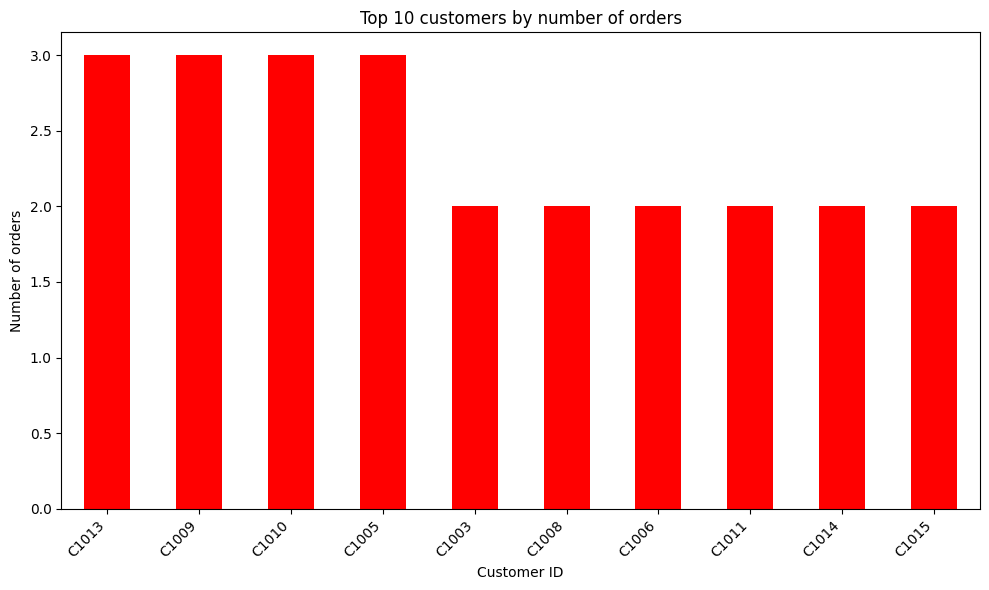

In [35]:
customer_order_counts = order_data['customer_id'].value_counts()

top_10_customers = customer_order_counts.head(10)

plt.figure(figsize=(10,6))
top_10_customers.plot(kind='bar', color= 'red')
plt.title('Top 10 customers by number of orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of orders')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()




# 4)Analyze the distribution of products across sub-categories.


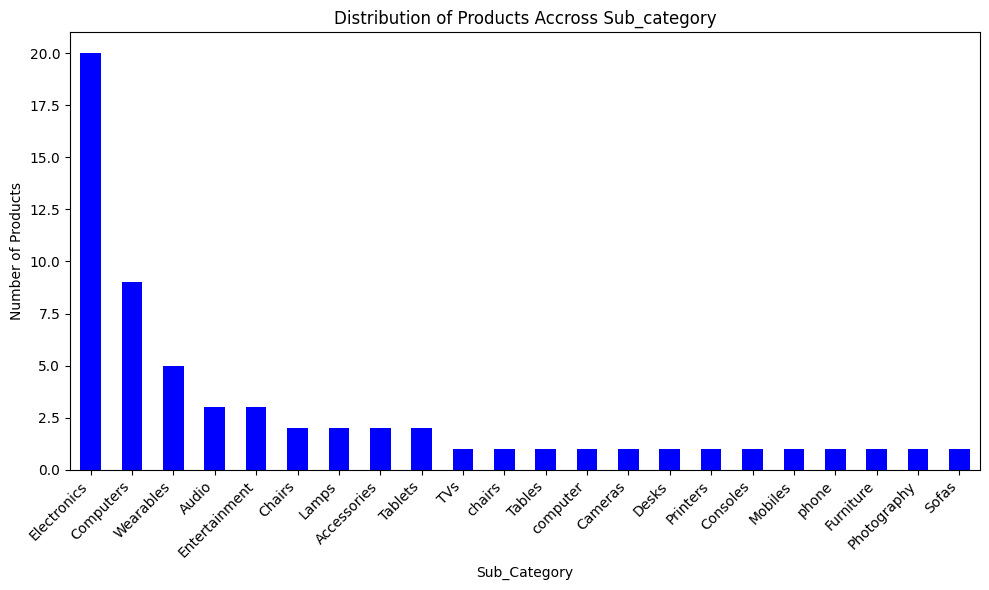

In [17]:
city_counts = product_data['sub_category'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10,6))
city_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Products Accross Sub_category')
plt.xlabel('Sub_Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()


# 5)Determine the total number of products available by category

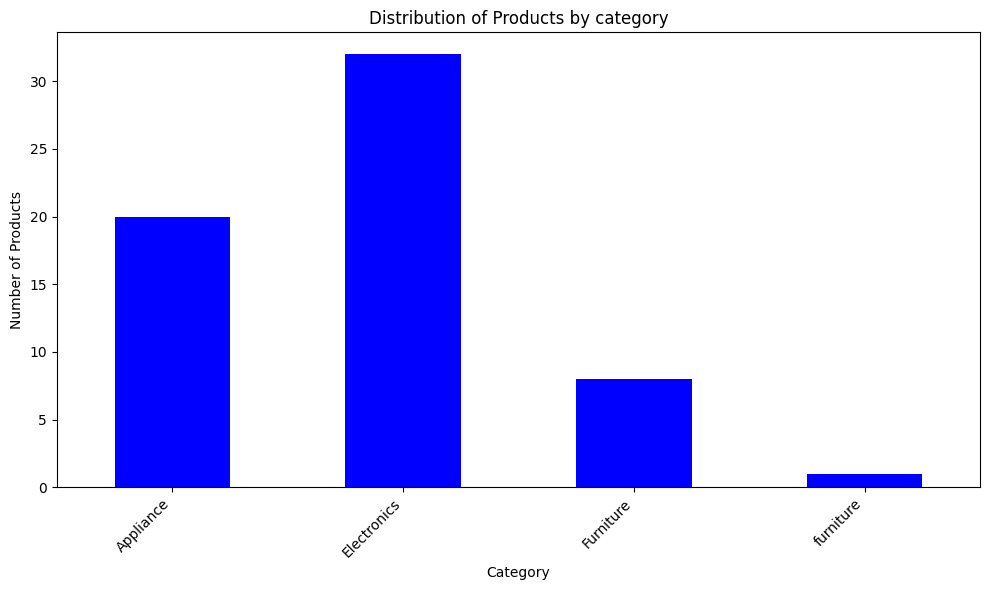

In [36]:
category_counts = product_data.groupby('category').size()
 #Plotting the bar graphs
plt.figure(figsize=(10,6))
category_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Products by category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()


# 6)Identify products with low stock levels.

   product_id    product_name     category sub_category  original_price  \
0        P102           Chair    furniture       Chairs        20000.00   
46       P148          Tablet  Electronics    Computers        30000.00   
39       P141         Printer  Electronics    Computers        12000.00   
10       P112           chair    Furniture       chairs         1000.00   
30       P132        Sofa Set    Furniture    Furniture        50000.00   
..        ...             ...          ...          ...             ...   
17       P119       Desk Lamp    Furniture        Lamps         3000.00   
1        P103          Laptop  Electronics     computer        60000.00   
23       P125      Smartwatch  Electronics    Wearables        15000.00   
4        P106       Laptop HP  Electronics    Computers        67200.00   
5        P107  Samsung Galaxy  Electronics      Mobiles        60000.99   

    selling_price  stock  
0        15000.00     10  
46       25000.00     10  
39       10000.00 

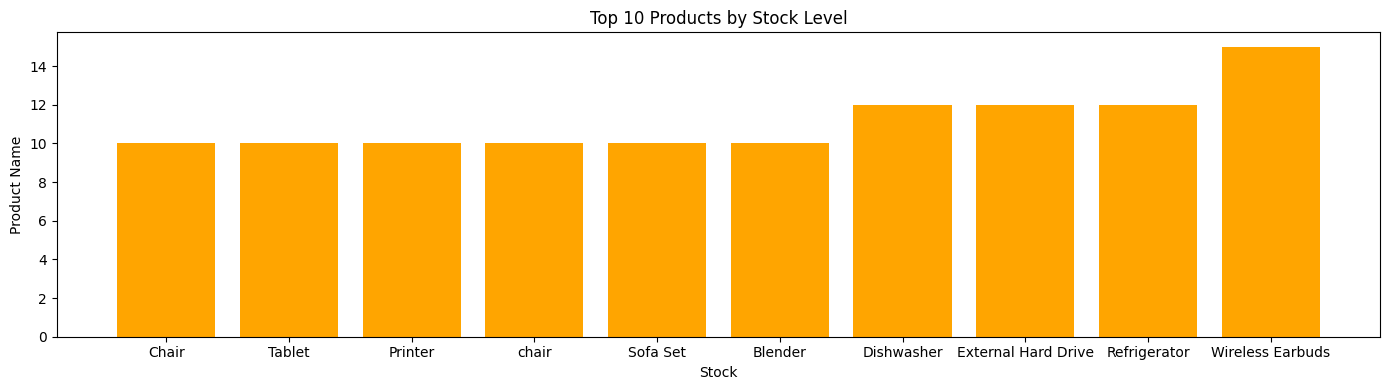

In [64]:
sorted_products = product_data.sort_values(by='stock', ascending=True)
print(sorted_products)
top_10_products = sorted_products.head(10)
plt.figure(figsize=(14, 4))
plt.bar(top_10_products['product_name'], top_10_products['stock'], color='orange')
plt.xlabel('Stock')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Stock Level')
plt.tight_layout()
plt.show()

# 7)Calculate the average, maximum, and minimum selling prices for 
products

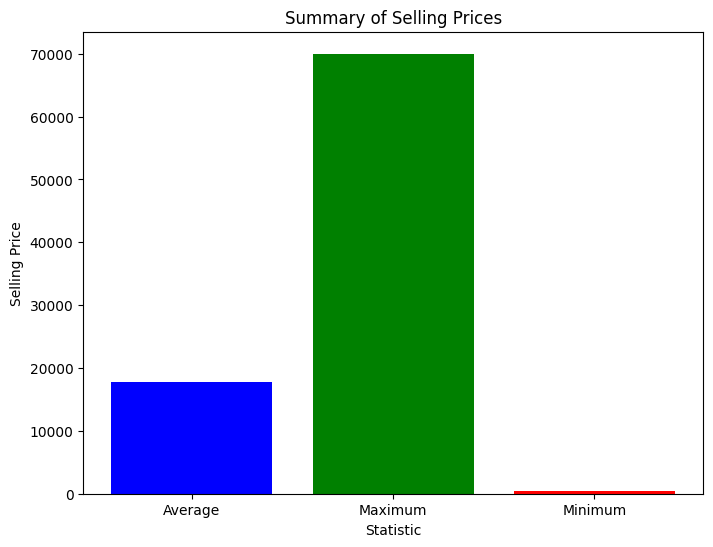

In [38]:
average_selling_price = product_data['selling_price'].mean()
maximum_selling_price = product_data['selling_price'].max()
minimum_selling_price = product_data['selling_price'].min()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Average', 'Maximum', 'Minimum'], [average_selling_price, maximum_selling_price, minimum_selling_price], color=['blue', 'green', 'red'])
plt.title('Summary of Selling Prices')
plt.xlabel('Statistic')
plt.ylabel('Selling Price')
plt.show()

# 8)Calculate the top 10 orders product wise

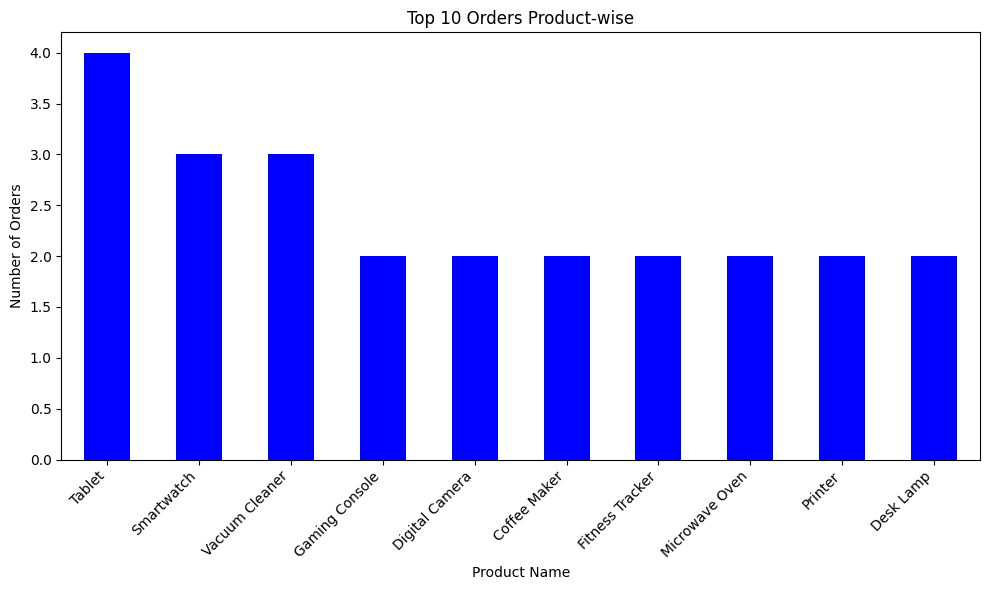

In [42]:
top_10_orders = product_data['product_name'].value_counts().head(10)

# Plotting the bar graph
plt.figure(figsize=(10,6))
top_10_orders.plot(kind='bar', color='blue')
plt.title('Top 10 Orders Product-wise')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 9)Analyze the order status distribution (e.g., pending, delivered)

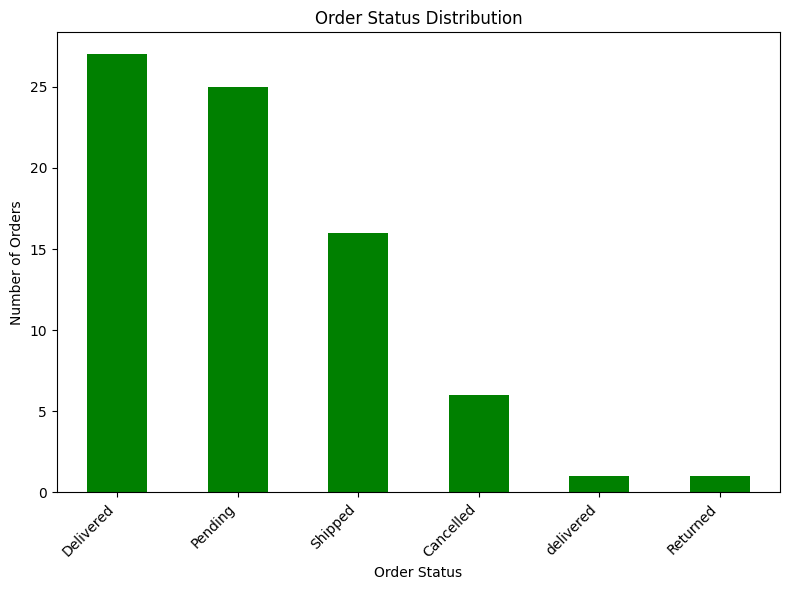

In [44]:
order_status_distribution = order_data['order_status'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8,6))
order_status_distribution.plot(kind='bar', color='green')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 10)Identify the most popular products based on order quantity

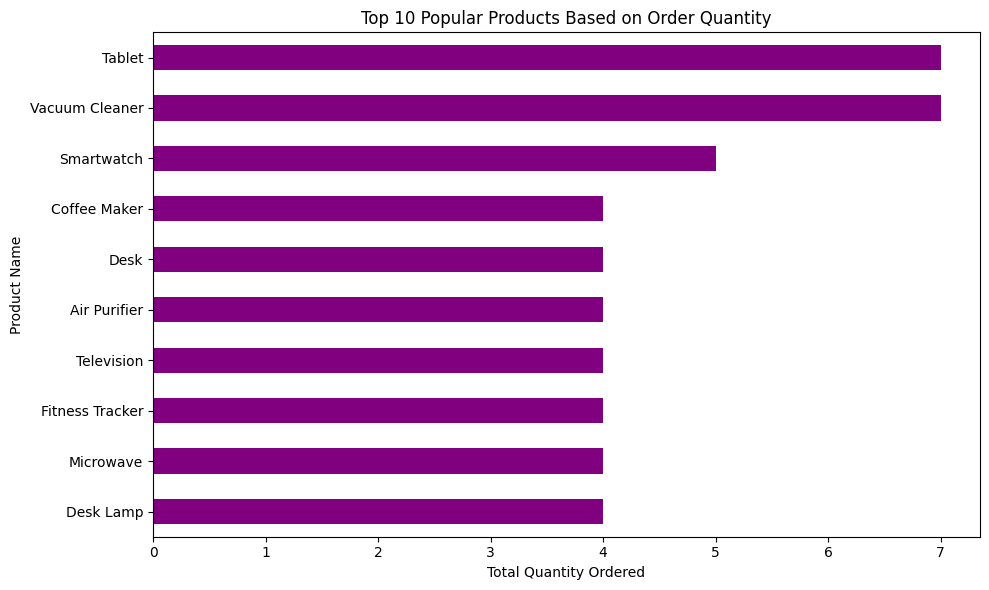

In [68]:
product_quantity_sold = merged_data.groupby('product_name')['quantity'].sum()

# Sort products based on total quantity sold
top_products = product_quantity_sold.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10,6))
product_quantity.sort_values().plot(kind='barh', color='purple')
plt.title('Top 10 Popular Products Based on Order Quantity')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# 11) Calculate total revenue generated from orders product wise

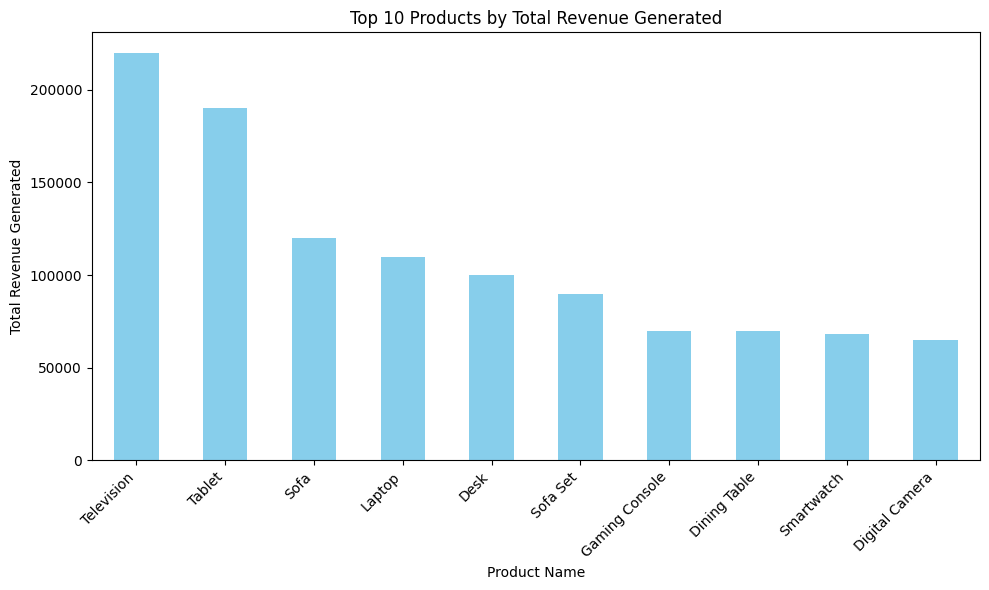

In [71]:
merged_data = pd.merge(order_data, product_data, on='product_id')

# Calculate revenue for each order
merged_data['revenue'] = merged_data['quantity'] * merged_data['selling_price']

# Group merged data by product name and sum the revenues
product_revenue = merged_data.groupby('product_name')['revenue'].sum()

# Sort products based on total revenue generated
top_products_revenue = product_revenue.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_products_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Total Revenue Generated')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 12)Calculate total revenue product category wise percentage

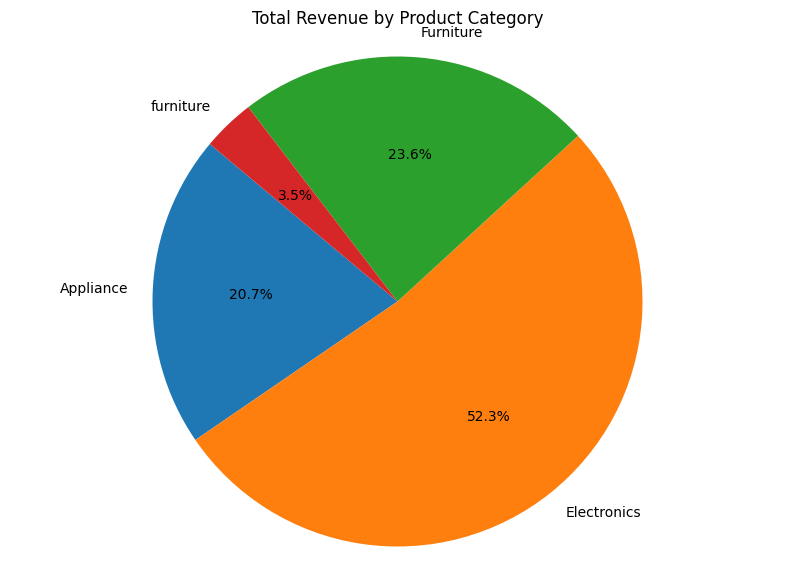

In [111]:
merged_df = pd.merge(order_data, customer_data, on='customer_id', how='left')
merged_df = pd.merge(merged_data, product_data, on='product_id', how='left')

# Calculate total revenue for each product category
category_revenue = merged_data.groupby('category')['total_price'].sum().reset_index()

# Calculate percentage of revenue for each product category
category_revenue['percentage'] = (category_revenue['total_price'] / category_revenue['total_price'].sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(category_revenue['percentage'], labels=category_revenue['category'], autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# 13)Calculate the total revenue generated from all orders

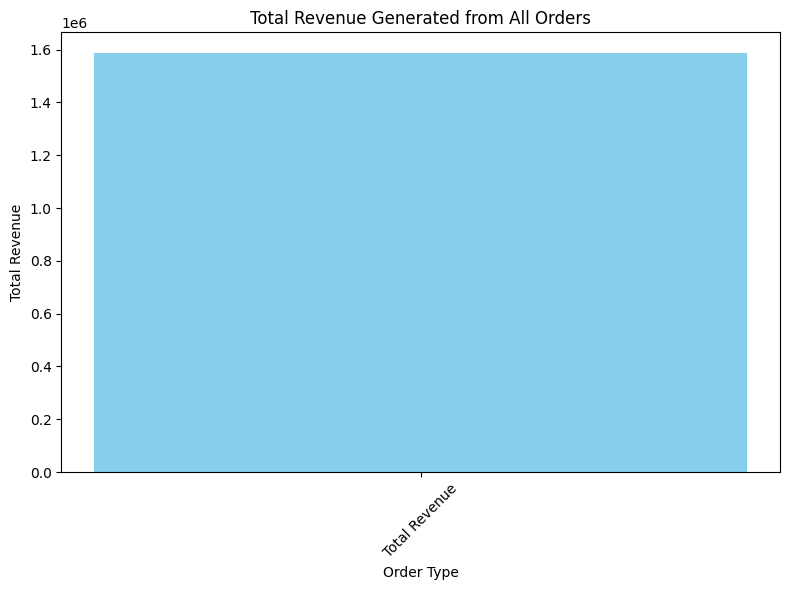

In [85]:
# Calculate total revenue generated from all orders
total_revenue_all_orders = order_data['total_price'].sum()

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue'], [total_revenue_all_orders], color='skyblue')
plt.title('Total Revenue Generated from All Orders')
plt.ylabel('Total Revenue')
plt.xlabel('Order Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 14)Identify the most profitable products based on the difference between 
original and selling prices

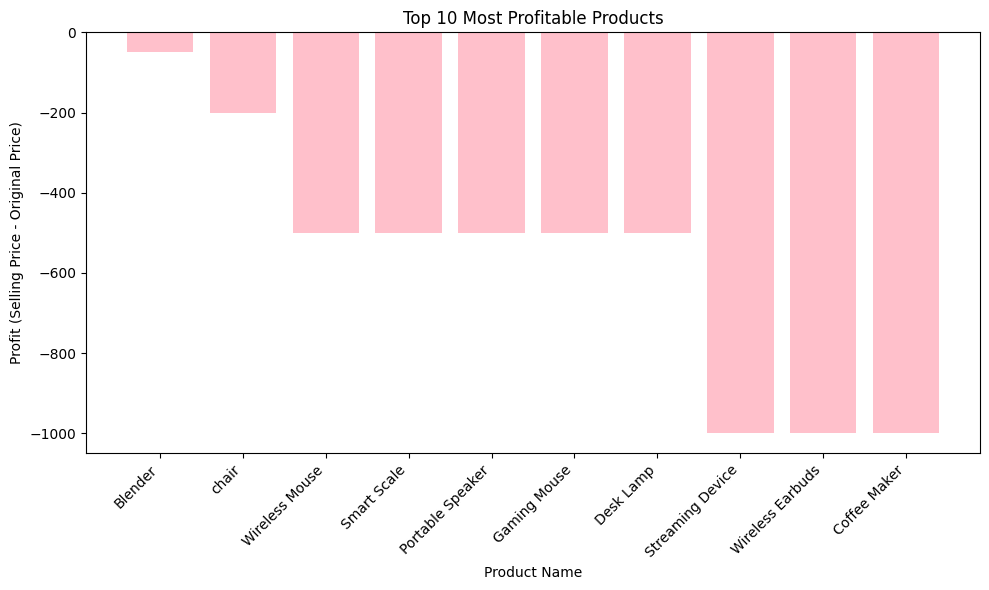

In [89]:
# Calculate the profit for each product
product_data['profit'] = product_data['selling_price'] - product_data['original_price']

# Sort products based on profit
most_profitable_products = product_data.sort_values(by='profit', ascending=False).head(10)

# Create a bar chart to visualize the most profitable products
plt.figure(figsize=(10, 6))
plt.bar(most_profitable_products['product_name'], most_profitable_products['profit'], color='pink')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Profit (Selling Price - Original Price)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 15)Identify product names with the highest and lowest order quantities

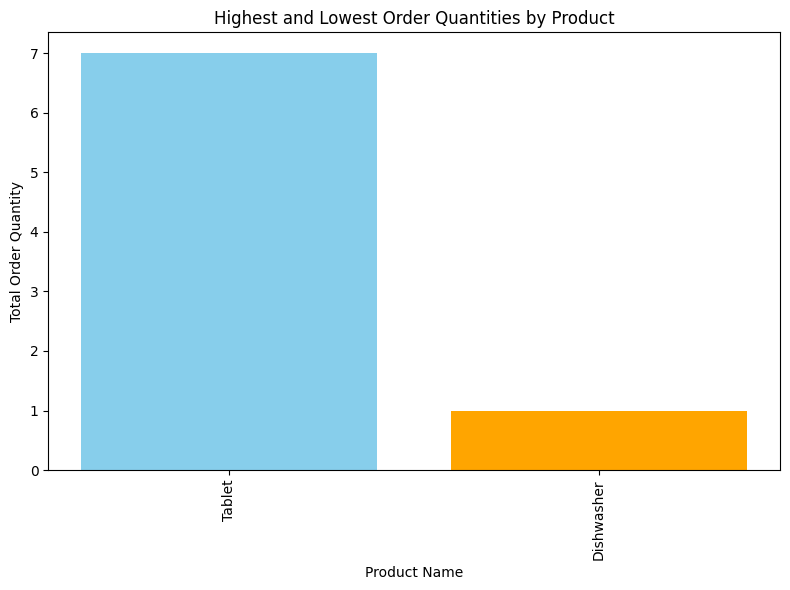

Product with the highest order quantity: Tablet
Highest order quantity: 7.0
Product with the lowest order quantity: Dishwasher
Lowest order quantity: 1.0


In [90]:
# Merge order_data with product_data on 'product_id'
merged_data = pd.merge(order_data, product_data, on='product_id')

# Group merged data by product name and sum the quantities
product_quantity_sold = merged_data.groupby('product_name')['quantity'].sum()

# Identify product with the highest order quantity
highest_quantity_product = product_quantity_sold.idxmax()
highest_quantity = product_quantity_sold.max()

# Identify product with the lowest order quantity
lowest_quantity_product = product_quantity_sold.idxmin()
lowest_quantity = product_quantity_sold.min()

# Create a bar plot for highest and lowest order quantities
plt.figure(figsize=(8, 6))
plt.bar([highest_quantity_product, lowest_quantity_product], [highest_quantity, lowest_quantity], color=['skyblue', 'orange'])
plt.title('Highest and Lowest Order Quantities by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Product with the highest order quantity:", highest_quantity_product)
print("Highest order quantity:", highest_quantity)
print("Product with the lowest order quantity:", lowest_quantity_product)
print("Lowest order quantity:", lowest_quantity)

# 16)Identify customers with the highest and lowest order quantities by customer name

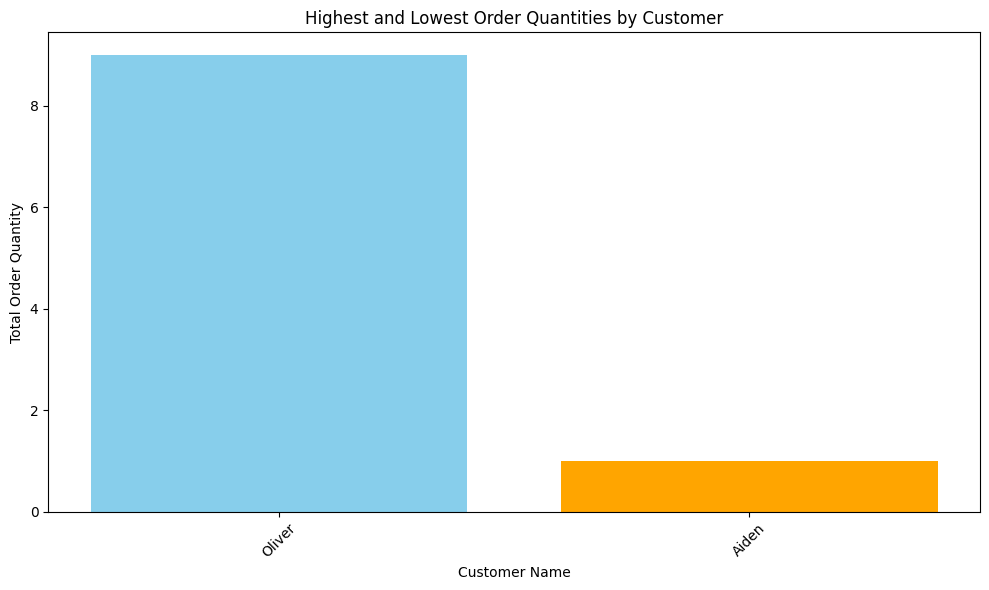

Customer with the highest order quantity: Oliver
Highest order quantity: 9.0
Customer with the lowest order quantity: Aiden
Lowest order quantity: 1.0


In [91]:
# Merge order_data with customer_data on 'customer_id'
merged_data = pd.merge(order_data, customer_data, on='customer_id')

# Group merged data by customer name and sum the quantities
customer_quantity_sold = merged_data.groupby('name')['quantity'].sum()

# Identify customer with the highest order quantity
highest_quantity_customer = customer_quantity_sold.idxmax()
highest_quantity = customer_quantity_sold.max()

# Identify customer with the lowest order quantity
lowest_quantity_customer = customer_quantity_sold.idxmin()
lowest_quantity = customer_quantity_sold.min()

# Create a bar plot for highest and lowest order quantities by customer
plt.figure(figsize=(10, 6))
plt.bar([highest_quantity_customer, lowest_quantity_customer], [highest_quantity, lowest_quantity], color=['skyblue', 'orange'])
plt.title('Highest and Lowest Order Quantities by Customer')
plt.xlabel('Customer Name')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Customer with the highest order quantity:", highest_quantity_customer)
print("Highest order quantity:", highest_quantity)
print("Customer with the lowest order quantity:", lowest_quantity_customer)
print("Lowest order quantity:", lowest_quantity)

# 17)Determine the most preferred payment modes

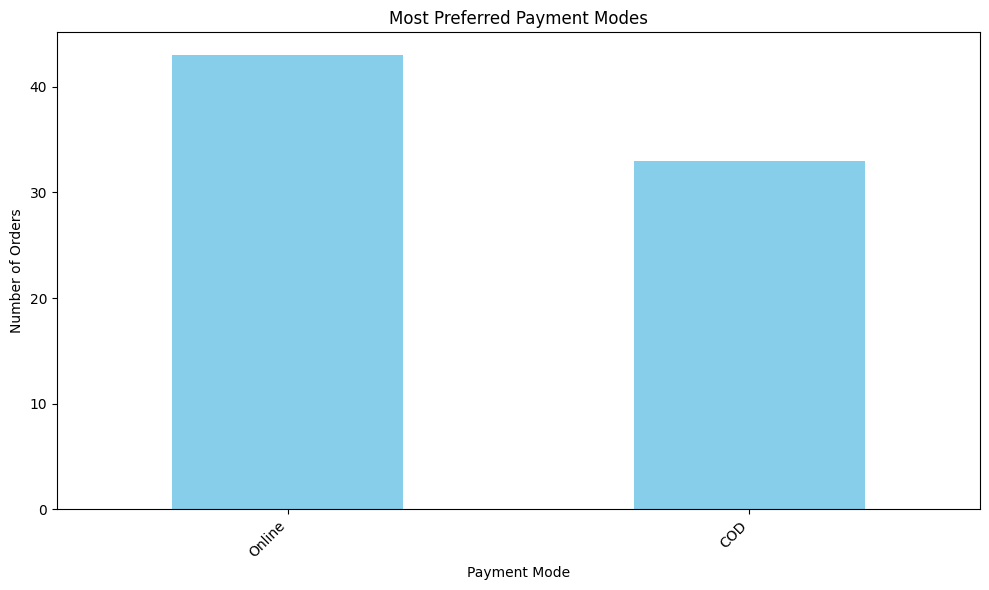

In [92]:
payment_modes = order_data['payment_mode'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10,6))
payment_modes.plot(kind='bar', color='skyblue')
plt.title('Most Preferred Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 18)Month wise total sales

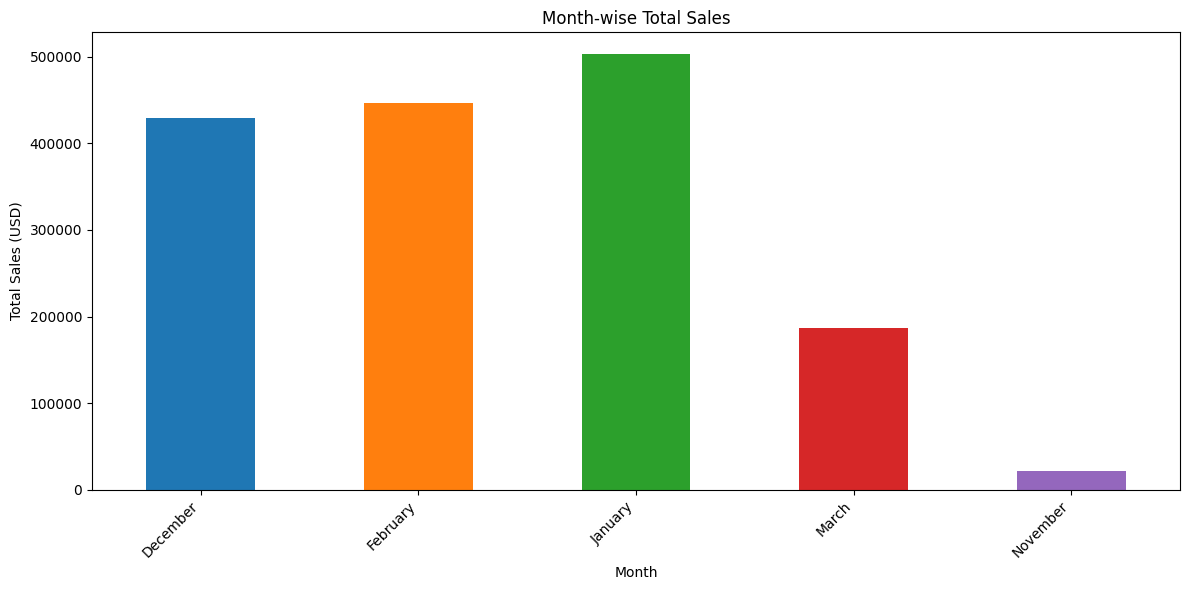

In [94]:
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Extract month from 'Order_Date' and create a new column 'Order_Month'
order_data['order_month'] = order_data['order_date'].dt.strftime('%B')

# Calculate month-wise total sales
month_sales = order_data.groupby('order_month')['total_price'].sum()

# Plotting the bar chart with different bar colors for each month
plt.figure(figsize=(12,6))
month_sales.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# 19)Month and year wise total sales

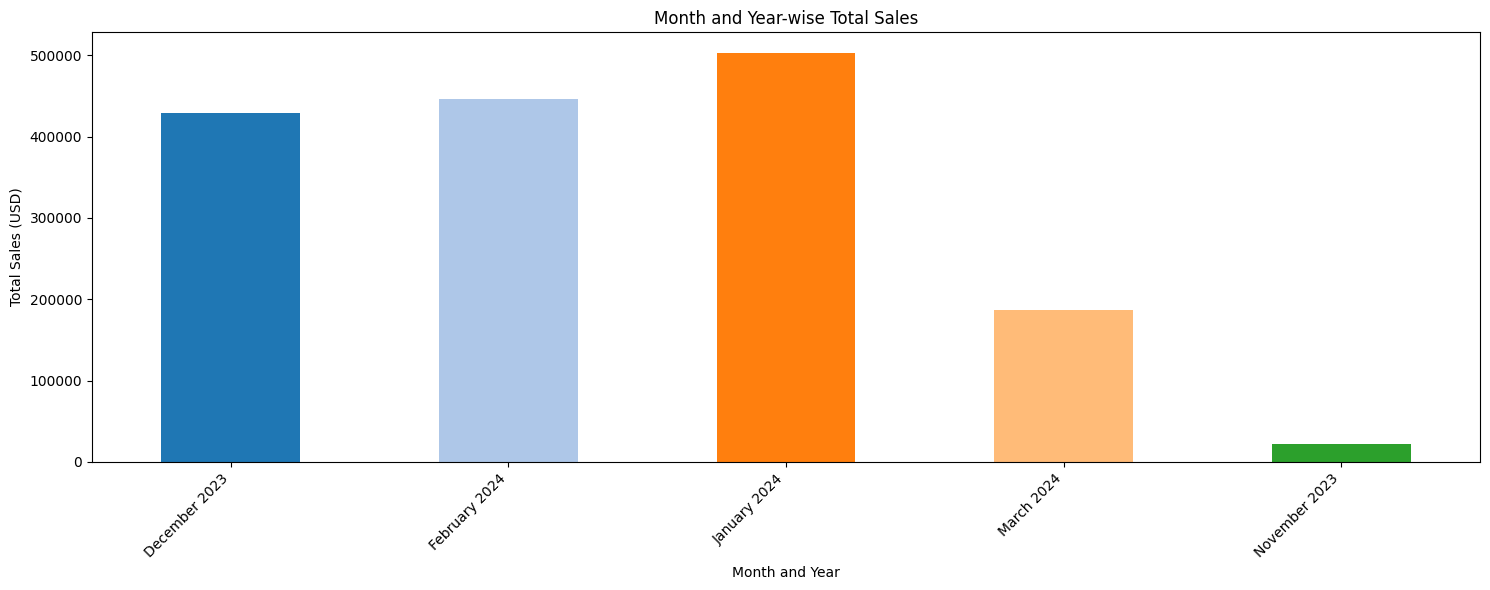

In [98]:
order_data['order_month_year'] = order_data['order_date'].dt.strftime('%B %Y')

# Calculate month and year-wise total sales
month_year_sales = order_data.groupby('order_month_year')['total_price'].sum()

# Plotting the bar chart with different bar colors for each month and year
plt.figure(figsize=(15,6))
month_year_sales.plot(kind='bar', color=plt.cm.tab20.colors)
plt.title('Month and Year-wise Total Sales')
plt.xlabel('Month and Year')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 20)Identify peak order date

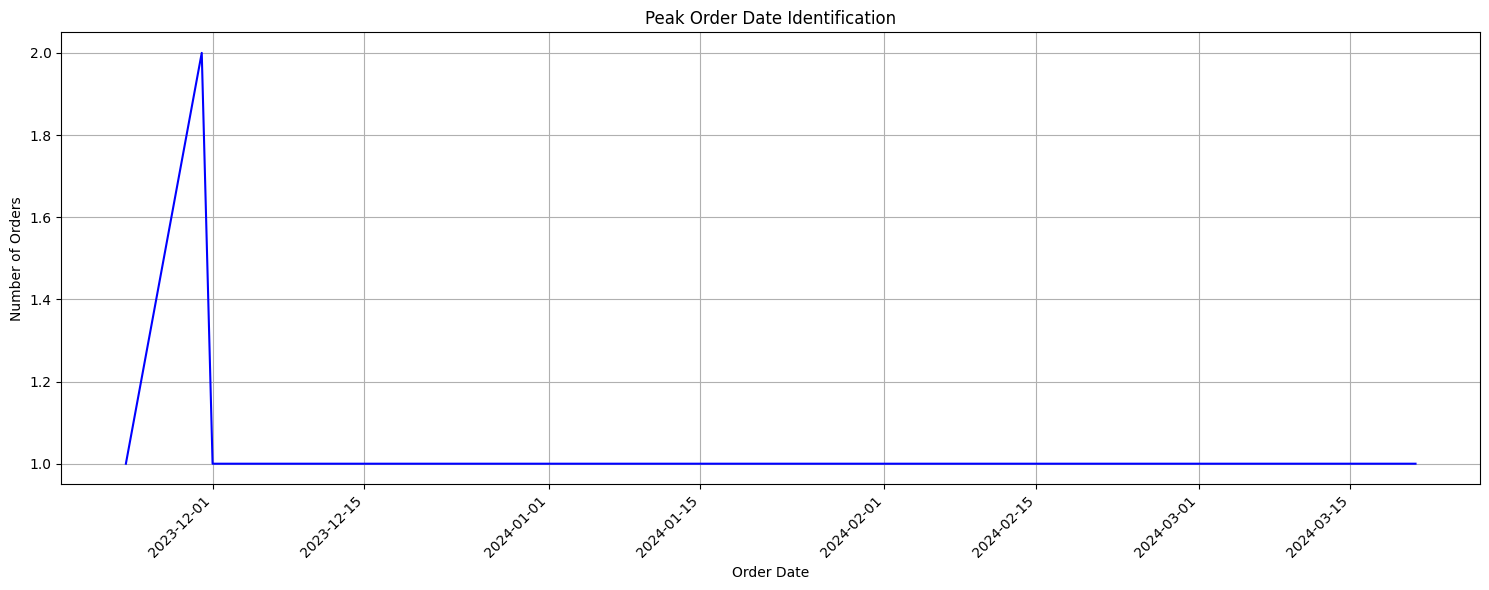

In [102]:
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Count the number of orders for each date
order_count = order_data['order_date'].value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(15,6))
order_count.plot(kind='line', color='b')
plt.title('Peak Order Date Identification')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 21)Explore the distribution of customers across different cities

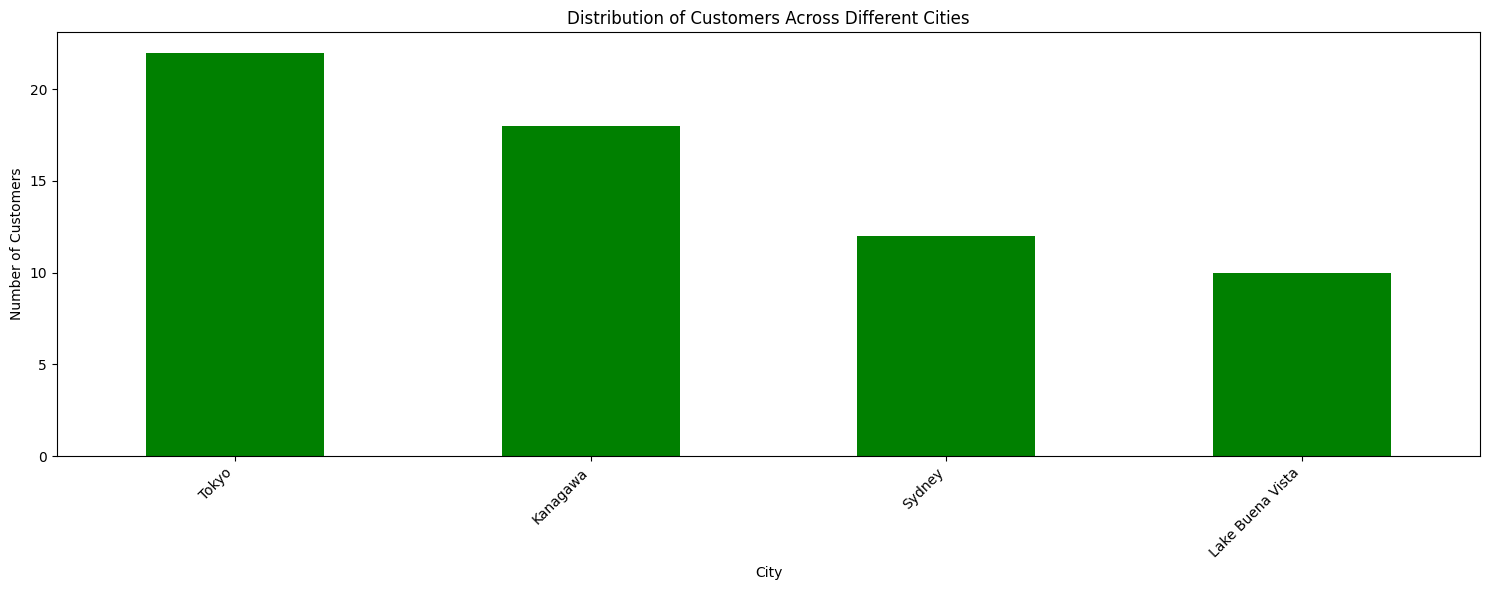

In [103]:
city_distribution = customer_data['city'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(15,6))
city_distribution.plot(kind='bar', color='green')
plt.title('Distribution of Customers Across Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 22)Analyze whether certain products or categories are more popular in a 
# specific city

# 23)Identify the best-selling products

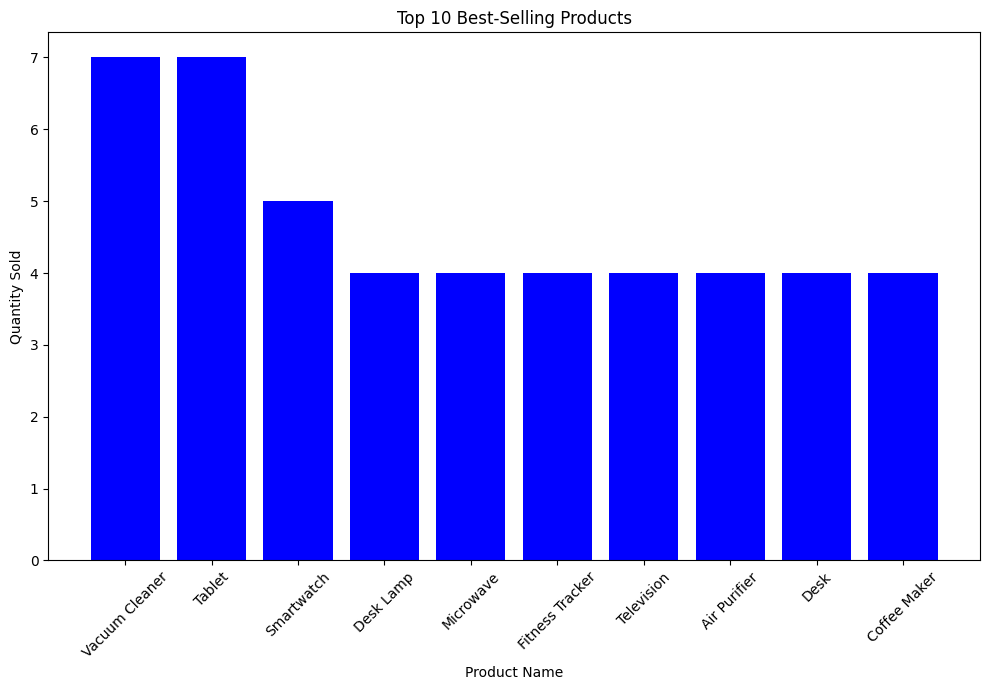

In [115]:
merged_df = pd.merge(order_data, customer_data, on='customer_id', how='left')
merged_df = pd.merge(merged_data, product_data, on='product_id', how='left')

# Calculate total quantity sold for each product
product_quantity = merged_data.groupby('product_name')['quantity'].sum().reset_index()

# Sort the products based on total quantity sold and select top 10
top_10_products = product_quantity.sort_values(by='quantity', ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 7))
plt.bar(top_10_products['product_name'], top_10_products['quantity'], color='blue')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 24)Identify top 10 slow-moving products based on low sales.

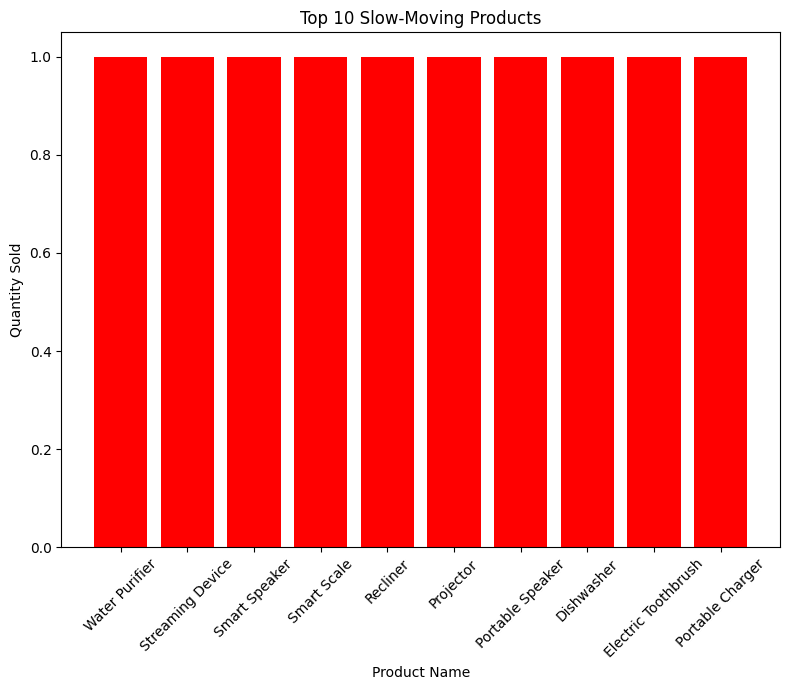

In [122]:
merged_df = pd.merge(order_data, customer_data, on='customer_id', how='left')
merged_df = pd.merge(merged_data, product_data, on='product_id', how='left')

# Calculate total quantity sold for each product
product_quantity = merged_data.groupby('product_name')['quantity'].sum().reset_index()

# Sort the products based on total quantity sold and select top 10 slow-moving products
top_10_slow_moving_products = product_quantity.sort_values(by='quantity').head(10)

# Plotting the bar chart
plt.figure(figsize=(8, 7))
plt.bar(top_10_slow_moving_products['product_name'], top_10_slow_moving_products['quantity'], color='red')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Slow-Moving Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 25)Display successful and pending payments order counts

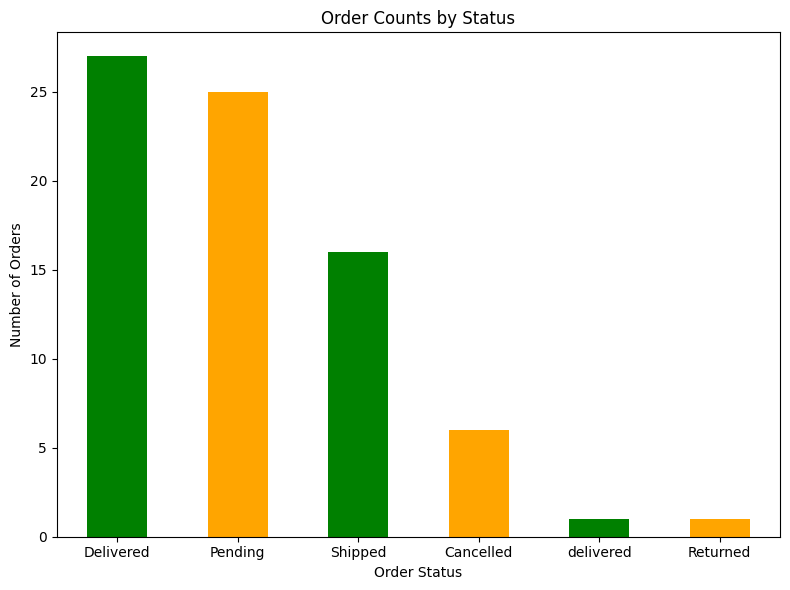

In [123]:
order_counts = order_data['order_status'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
order_counts.plot(kind='bar', color=['green', 'orange'])
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Order Counts by Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()